# Euclid astrometry notebook

This notebook plots the astrometric distortion for a CCD

In [5]:
# Do all boring imports
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

from matplotlib.pylab import griddata
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
CCDNO=2

# Read CCD fits file
img = fits.open('simone_ccd.fits')
w = WCS(img[CCDNO].header)

img_nofix = fits.open('simone_ccd_nofix.fits')
w_nofix = WCS(img_nofix[CCDNO].header)


In [12]:
x, y = np.meshgrid(np.arange(1, w.wcs.crpix[0]*2, 100), np.arange(1, w.wcs.crpix[1]*2, 100))
x, y = x.flatten(), y.flatten()

ra, dec = w_nofix.wcs_pix2world(x, y, 1)
c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree)

refra, refdec = w.wcs_pix2world(x, y, 1)
refc = SkyCoord(ra=refra*u.degree, dec=refdec*u.degree)

idx, d2d, d3d = c.match_to_catalog_sky(refc)
mask = d2d.arcsec<22


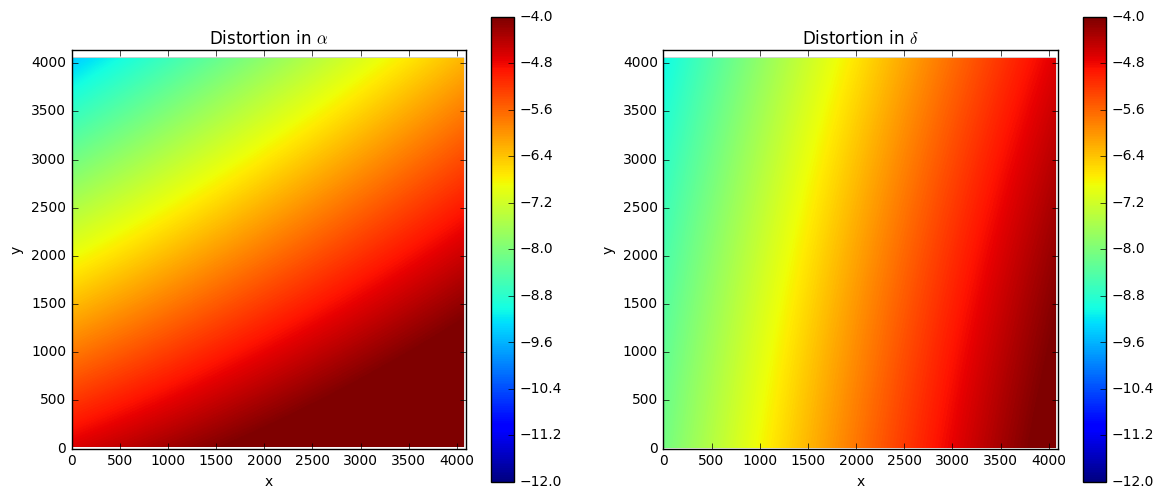

In [13]:
xs, ys = np.meshgrid(np.arange(0, w.wcs.crpix[0]*2, 10), np.arange(0, w.wcs.crpix[1]*2, 10))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
res = griddata(x[mask], y[mask], (ra-refra)[mask]*3600.0, xs, ys, interp='linear')
plt.imshow(res.T, extent=(1,w.wcs.crpix[0]*2,1,w.wcs.crpix[1]*2), origin='lower', vmin=-12, vmax=-4)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Distortion in $\alpha$')
plt.colorbar()

plt.subplot(1,2,2)
res = griddata(x[mask], y[mask], (dec-refdec)[mask]*3600.0, xs, ys, interp='linear')
plt.imshow(res.T, extent=(1,w.wcs.crpix[0]*2,1,w.wcs.crpix[1]*2), origin='lower', vmin=-12, vmax=-4)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Distortion in $\delta$')

_ = plt.colorbar()


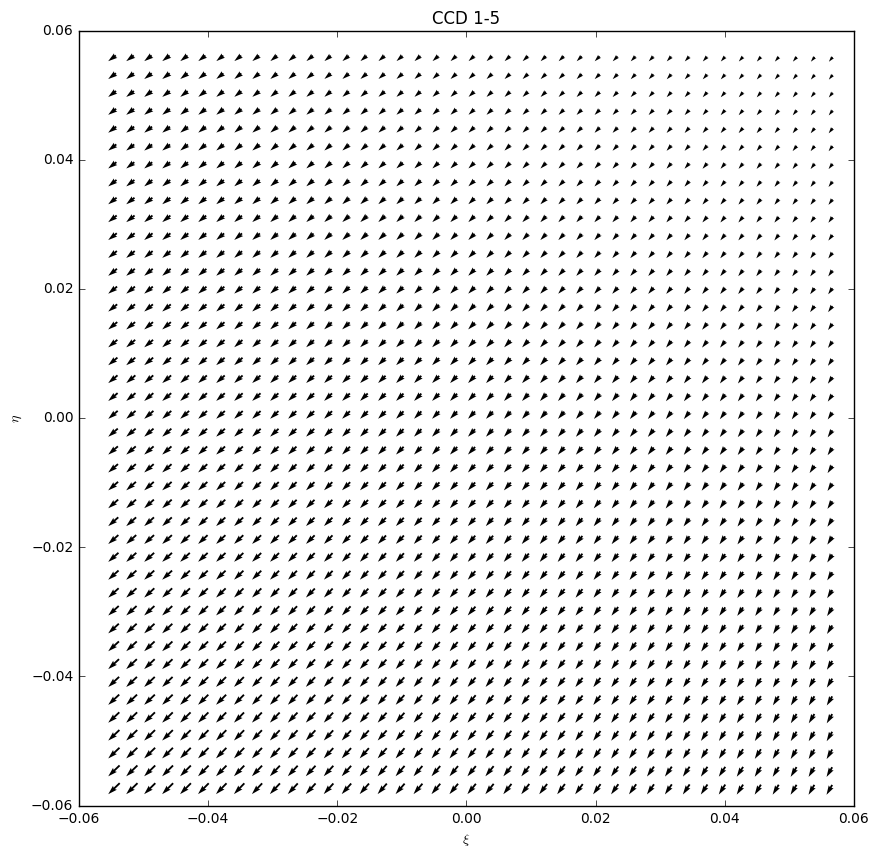

In [14]:
plt.figure(figsize=(10,10))

plt.quiver((refra[mask]-w.wcs.crval[0])*np.cos(np.radians(w.wcs.crval[1])), refdec[mask]-w.wcs.crval[1], (ra-refra)[mask]*3600.0, (dec-refdec)[mask]*3600.0,scale_units='xy',units='xy',norm=True)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\eta$')
_ = plt.title('CCD {}'.format(img[CCDNO].header['CCDID']))
